In [214]:
import numpy as np
import HTSeq
import pandas as pd
from collections import Counter
from plotnine import *
from matplotlib import pyplot as plt

In [216]:
class Sanger_Reads:
    def __init__(self, file):
        self.filepath = file
        self.raw_reads = None
        self.clean_reads = None
        self.open_reads()
    
    #read fasta file and save reads into dict object
    def open_reads(self):
        Sequence = HTSeq.FastaReader(self.filepath)
        self.raw_reads = {i.name:i for i in Sequence}
        
    def stat(self,min_len = 200):
        # filte reads which legnth is less than min_len
        self.clean_reads = {i:self.raw_reads[i] for i in self.raw_reads if len(self.raw_reads[i]) > min_len}
        
        # extract BAC id and count frequency
        ids = [i.split('_')[0] for i in self.clean_reads.keys()]
        count = Counter(ids)
        
        num_paired = 0
        num_single = 0
        single_id = []
        exception = []
        for i in count:
            if count[i] == 1:        # Single
                num_single += 1
                single_id.append(i)
            elif count[i] == 2:      # Both
                num_paired += 1
            else:                    # Exception
                exception.append(i)
        print('Both of BES have %s' %num_paired)
        print('Only single BES have %s' % num_single)
        print('The exception BAC followed: ')
        print(exception)
        print('Only One End Sequence have:')
        print(single_id)
    
    # plot histgram of the distribution of length of raw reads 
    def plot_length_distribution(self,bins=range(0,1200,50)):
        lengths = pd.DataFrame({'length':[len(i) for i in self.raw_reads.values()]})
#        plot = ( ggplot(lengths, aes(x='length')) 
#                + geom_histogram(binwidth=bins, fill='green', color='white')
#                + theme(figure_size=(20, 10),text=element_text(size=24)) )
#        print(plot)
        plt.figure(dpi=800)
        plt.hist([len(i) for i in self.raw_reads.values()], bins=bins, color='g', edgecolor='w')
        plt.title('Histogram of the length of BAC end Sequence')
        plt.xlabel('Length (bp)')
        plt.ylabel('The number of BACs')
        plt.show()

In [217]:
S = Sanger_Reads(file = r'../Documents/BAC_Company/Sanger_Sequencing/Project/BIg_Yellow_Crocker/BES_Project_of_Big_Yellow_Crocker.fasta')


In [218]:
S.stat(min_len=100)

Both of BES have 407
Only single BES have 108
The exception BAC followed: 
[]
Only One End Sequence have:
['100-J20', '100-P01', '100-H11', '100-A04', '100-B02', '100-K11', '100-J10', '100-N14', '100-C03', '100-L20', '100-M20', '100-K15', '100-G07', '100-K12', '100-L21', '100-I18', '100-I10', '100-B03', '100-E18', '100-K22', '100-C04', '100-M18', '100-N15', '100-I23', '100-I08', '100-F07', '100-D20', '100-L05', '100-B13', '100-P07', '100-E15', '100-I17', '100-E17', '100-F13', '100-P15', '100-A05', '100-A17', '100-H13', '100-B20', '100-E02', '100-N07', '100-N17', '100-F05', '100-P13', '100-C20', '101-A14', '101-D14', '101-B17', '101-E16', '101-L16', '101-K20', '101-N22', '101-M16', '101-J11', '102-D14', '102-E16', '102-A19', '102-C02', '102-D02', '102-F15', '102-F21', '102-G11', '102-G13', '102-F07', '102-G20', '102-I02', '102-I08', '102-I13', '102-I15', '102-J12', '102-J15', '102-J22', '102-K17', '102-L14', '101-L13', '102-E15', '102-F09', '102-H15', '101-D17', '101-G11', '101-G14', '1

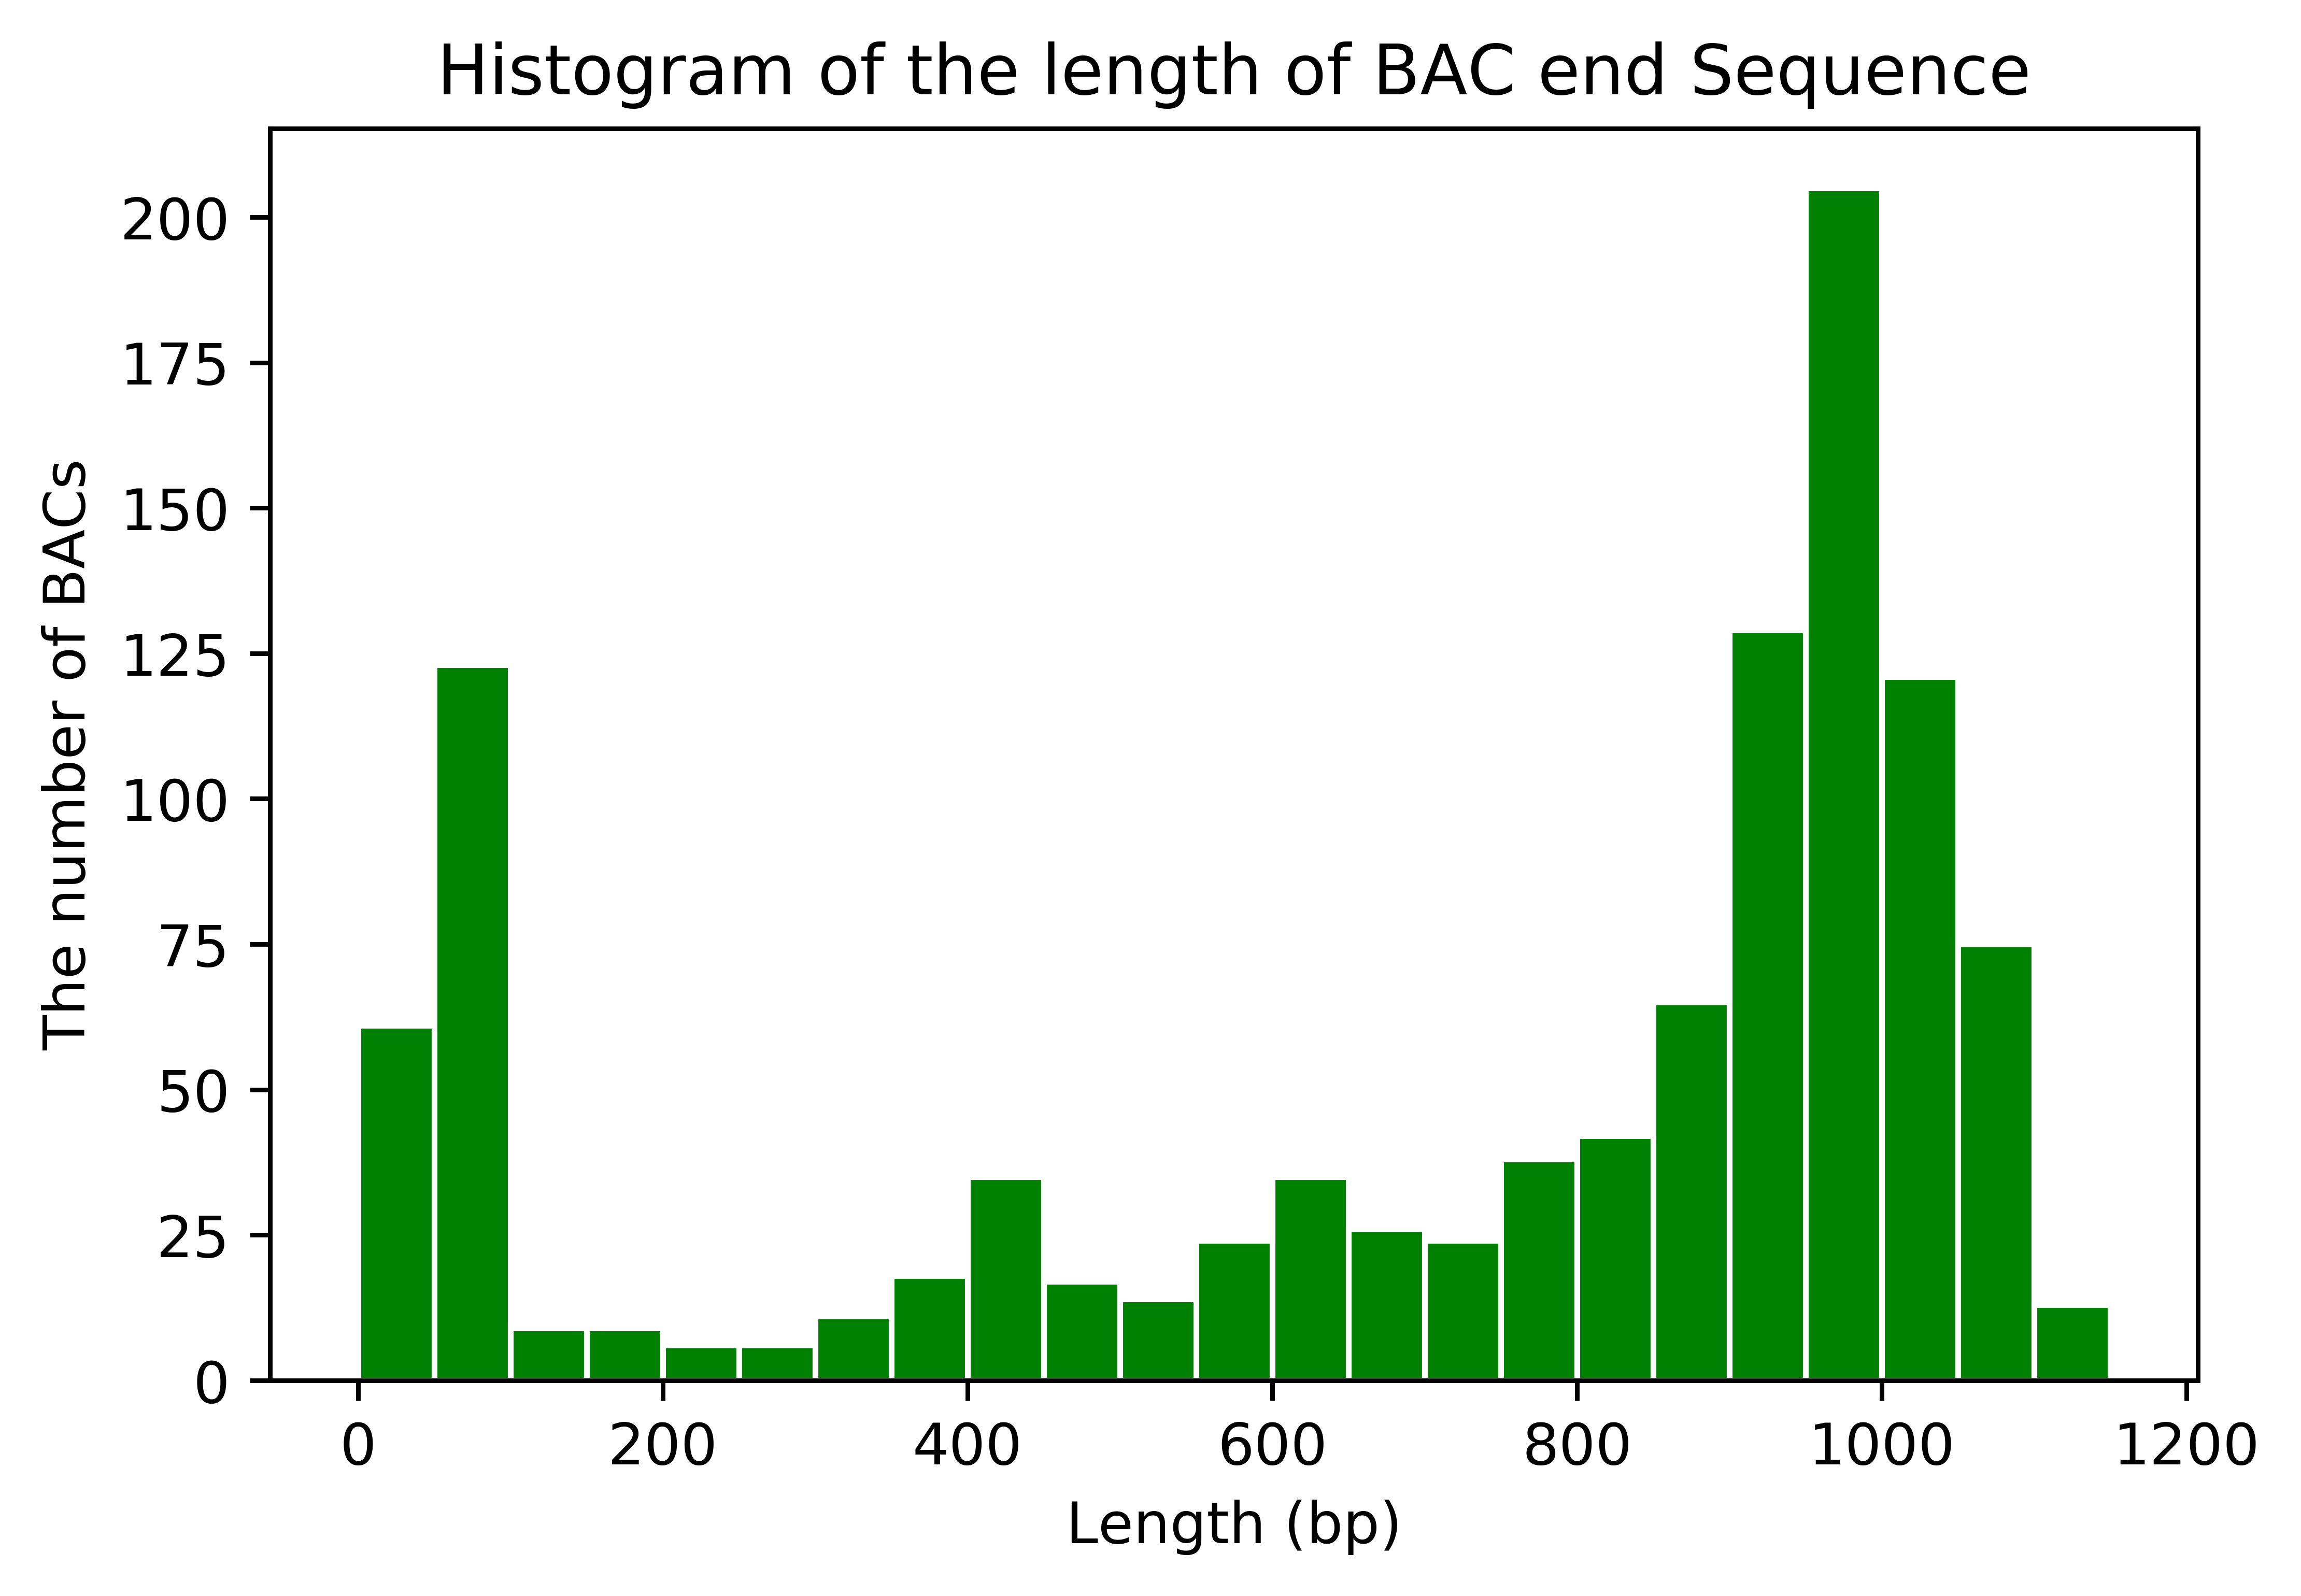

In [219]:
S.plot_length_distribution()